In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importando o dataset e realizando uma visualização geral/superficial inicial

In [73]:
winequality_dataset = pd.read_csv("winequality.csv")
winequality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


Realizando uma análise um pouco mais detalhada a cerca de como os dados e como eles estão distribuidos

In [74]:
winequality_dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Limpeza do dataset

In [75]:
#Remove a coluna chamada "Unnamed: 0".
winequality_dataset.drop('Unnamed: 0', axis=1, inplace=True)
#Substituindo os espaços entre as palavras do cabeçalho pelo underline.
winequality_dataset.columns = winequality_dataset.columns.str.replace(" ", "_")

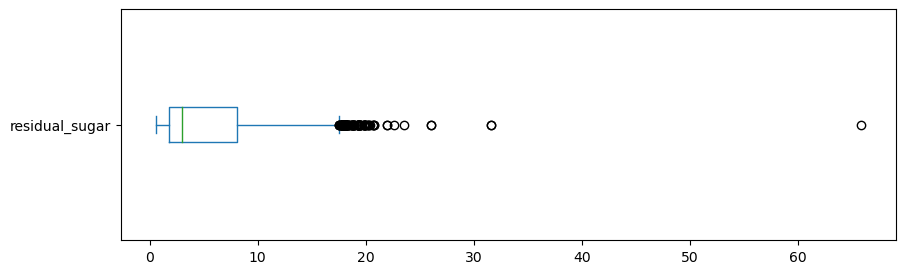

In [76]:
#Plotagem de um gráfico simples para analisar melhor a coluna residual_sugar.
winequality_dataset.residual_sugar.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 25 (só há três valores maiores)
winequality_dataset.drop(winequality_dataset[winequality_dataset.residual_sugar > 25].index, axis=0, inplace=True)

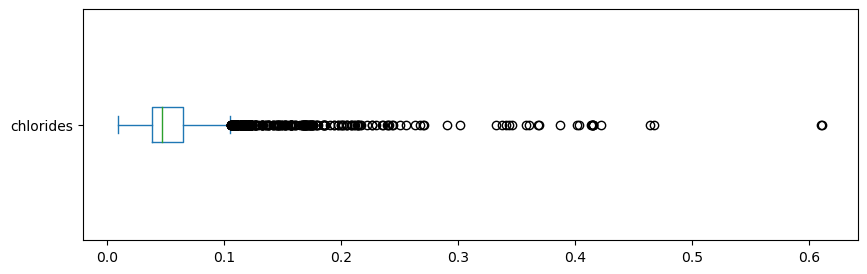

In [77]:
#Plotagem de um gráfico simples para analisar melhor a coluna chlorides.
winequality_dataset.chlorides.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 25 (só há três valores maiores)
winequality_dataset.drop(winequality_dataset[winequality_dataset.chlorides > 0.3].index, axis=0, inplace=True)

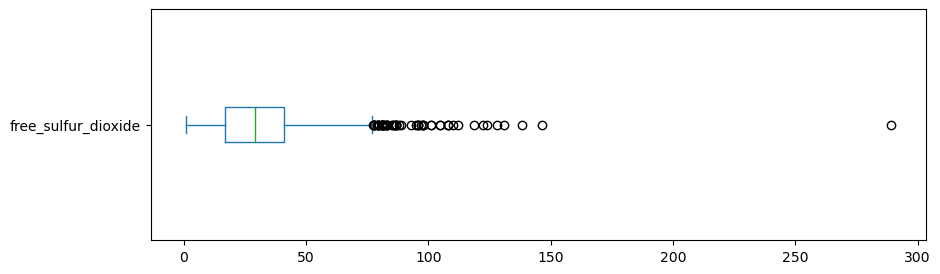

In [78]:
#Plotagem de um gráfico simples para analisar melhor a coluna free sulfur dioxide.
winequality_dataset.free_sulfur_dioxide.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 150 (há apenas um)
winequality_dataset.drop(winequality_dataset[winequality_dataset.free_sulfur_dioxide > 120].index, axis=0, inplace=True)

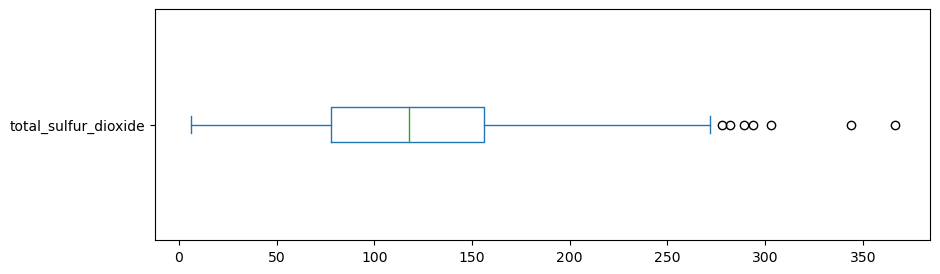

In [79]:
#Plotagem de um gráfico simples para analisar melhor a coluna total sulfur dioxide.
winequality_dataset.total_sulfur_dioxide.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 250 (há apenas um)
winequality_dataset.drop(winequality_dataset[winequality_dataset.total_sulfur_dioxide > 275].index, axis=0, inplace=True)

Separando o dataset entre dataset de treinamento e de teste

In [80]:
x = winequality_dataset.iloc[:, 0:12]
y = winequality_dataset.iloc[:, 12]
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, random_state=0, test_size=0.2)

In [81]:
#Normalizando o dataset
normaliza = StandardScaler()

x_treinamento = normaliza.fit_transform(x_treinamento)
x_teste = normaliza.transform(x_teste)

Aplicando o algoritmo de KNN

In [82]:
#Verificando o valor de K ideal
import math
math.sqrt(len(x_treinamento))
#Como 72 é um número par, vamos utilizar o valor de 71

71.85401867675878

In [83]:
from collections import Counter

#Euclidean Distance
def calcula_distancia(ponto1, ponto2):
    distancia = np.sqrt(np.sum((ponto1-ponto2)**2))
    return distancia
 
#Function to calculate KNN
def predict(x_train, y_train , x_test, y_test, k):
    rotulos_y_test = []
    #Loop atraves dos pontos que precisam ser classificados
    for ponto_teste in x_test: 
        #Lista para armazenar as distancias
        point_dist = []
        #Loop atravesando cada dado do treinado
        for ponto_treino in range(len(x_train)): 
            #Calcula distancia
            distances = calcula_distancia(np.array(x_train[ponto_treino,:]), ponto_teste) 
            #Armazena as distancias na lista
            point_dist.append(distances) 

        dataframe_distancias = pd.DataFrame(data=point_dist, columns=['dist'], index=y_train.index)

        #Ordena as distancias e considera apenas as K pontos mais próximos 
        dataframe_ordenado = dataframe_distancias.sort_values(by=['dist'], axis=0)[:k]
         
        #Rastreia qual o rótulo dos K objetos mais próximos
        counter = Counter(y_train[dataframe_ordenado.index])
         
        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        rotulos_y_test.append(prediction)
        
    return rotulos_y_test

In [84]:
y_pred = predict(x_treinamento, y_treinamento, x_teste, y_teste, 71)

In [85]:
#Realizando o teste de acurácia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_teste, y_pred))

0.9922540666150271


In [86]:
#Comparar o resultado obtido com o resultado gerado pelo algoritmo de KNN fornecido pelo sklearn
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=71)
clf.fit(x_treinamento, y_treinamento)
y_pred_test = clf.predict(x_teste)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_teste, y_pred_test)}")

Sklearn KNN Accuracy: 0.9922540666150271


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

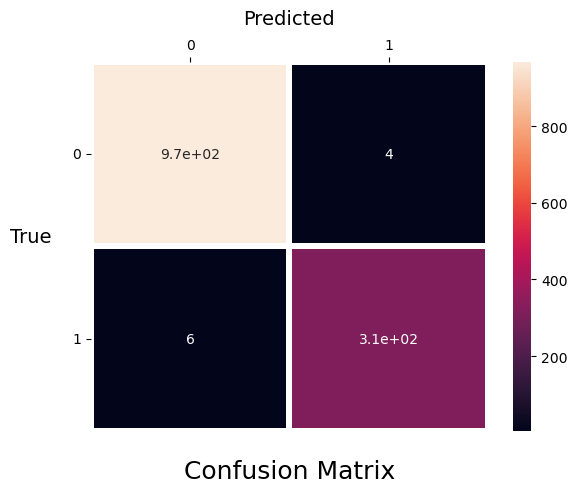

In [88]:
confusionmatrix = confusion_matrix(y_teste, y_pred)
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix, annot=True, linewidth=3)
plt.xlabel("Confusion Matrix", fontsize=18, labelpad=20)
ax.xaxis.tick_top()
plt.ylabel("True", fontsize=14, rotation=0, labelpad=30)
plt.yticks(rotation=0)
plt.title("Predicted", fontsize=14, pad=10)
plt.show()

In [89]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       972
           1       0.99      0.98      0.98       319

    accuracy                           0.99      1291
   macro avg       0.99      0.99      0.99      1291
weighted avg       0.99      0.99      0.99      1291



In [90]:
winequality_dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,7.210048,0.338951,0.317586,5.426085,0.054754,30.420669,115.522467,0.994672,3.219176,0.529063,10.495821,5.822746,0.244035
std,1.296688,0.164316,0.144056,4.664604,0.027594,17.182593,55.835423,0.002932,0.160598,0.142990,1.192846,0.870796,0.429547
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994860,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996950,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,23.500000,0.290000,118.500000,272.000000,1.003690,4.010000,1.980000,14.900000,9.000000,1.000000


Realizando uma classificação binária

In [91]:
novo_ponto = []
#Transformação em um dataframe
df_novo_ponto = pd.DataFrame(novo_ponto, columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])